
## Goal - To predict if a client will default the credit card payment for the next month or not

## Variable Description:

#### ID: ID of each client
#### LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
#### SEX: Gender (1=male, 2=female)
#### EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#### MARRIAGE: Marital status (1=married, 2=single, 3=others)
#### AGE: Age in years
#### PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
#### PAY_2: Repayment status in August, 2005 (scale same as above)
#### PAY_3: Repayment status in July, 2005 (scale same as above)
#### PAY_4: Repayment status in June, 2005 (scale same as above)
#### PAY_5: Repayment status in May, 2005 (scale same as above)
#### PAY_6: Repayment status in April, 2005 (scale same as above)
#### BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
#### BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#### BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
#### BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
#### BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
#### BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
#### PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
#### PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
#### PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
#### PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
#### PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
#### PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
#### default.payment.next.month: Default payment (1=yes, 0=no)

# 1. Reading Data

In [333]:
# Import General Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from fastai.imports import *
from fastai.structured import *
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [334]:
#reading data
df = pd.read_csv("/home/rk9cx/Kaggle/Credit Card Default/UCI_Credit_Card.csv")
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# 2. Exploratory Data Analysis & Data Cleaning

## 2.1 Missing Values

In [315]:
#check for missing values
df.isna().any()
#there are no missing values in the dataset

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

## 2.2 Dealing with Categorical Variables

In [316]:
#the main goal is to process the categorical variables correctly and reduce dimensionality if possible.
#check for datatypes of all variables
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [317]:
df["AGE"].unique()
#there is room to convert age into bins if necessary. We will leave it as numeric as of now

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47, 33, 32, 54, 58, 22, 25, 31, 46,
       42, 43, 45, 56, 44, 53, 38, 63, 36, 52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64,
       65, 71, 69, 68, 79, 74])

2    18112
1    11888
Name: SEX, dtype: int64


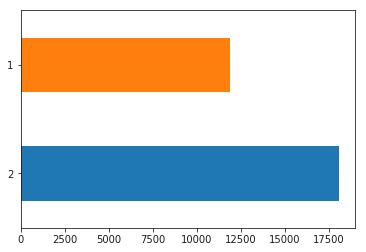

In [318]:
df["SEX"].value_counts().plot(kind = 'barh') 
print(df["SEX"].value_counts())
#there is a majority of women as compared to men which doesnt sound an alarm

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


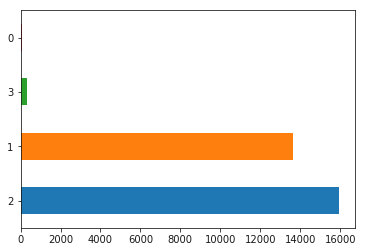

In [319]:
df["MARRIAGE"].value_counts().plot(kind = 'barh') 
print(df["MARRIAGE"].value_counts())

In [320]:
#zero stands for missing information and can be imputed to 3 (others)
df["MARRIAGE"].replace([0], 3, inplace=True)
print(df["MARRIAGE"].value_counts())

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


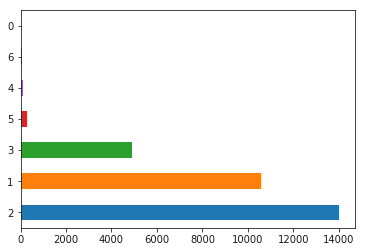

In [321]:
df["EDUCATION"].value_counts().plot(kind = 'barh') 
print(df["EDUCATION"].value_counts())

In [322]:
#0, 5 and 6  stands for missing information or undocumented information and can be imputed to 4 (others)
df["EDUCATION"].replace([0,5,6], 4, inplace=True)
print(df["EDUCATION"].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


In [323]:
# Sex, Marriage and Education are definitely categorical variables
collist = ['SEX','EDUCATION','MARRIAGE']
for col in collist:
    df[col] = df[col].astype('category',copy=False)

In [324]:
#checking cardinality of the categorical variables
collist = ['SEX','EDUCATION','MARRIAGE']
for col in collist:
    print(str(col) + ":" + str(len(df[col].unique())))

SEX:2
EDUCATION:4
MARRIAGE:3


In [325]:
#Because the categorical variables have low cardinality, they can be converted to one-hot encoding
#Function for one hot-encoding
def make_onehot_feat_dict(df, feat_key, feat_name):
    # Create features for each day of the week
    feat_vals = df[feat_key].values
    all_vals = np.unique(feat_vals)
    N_vals = len(all_vals)
    N_feat = N_vals - 1

    # Create keys
    keys = [0]*N_feat
    for i in range(N_feat):
        keys[i] = 'f_'+feat_name+'_'+ str(all_vals[i])

    # Create value for each training example in dict
    feat_dict = {}
    for i, k in enumerate(keys):
        this_day = all_vals[i]
        feat_dict[k] = feat_vals == this_day
    return feat_dict

In [326]:
#converting sex, marriage and education into one-hot
sexfeat_dict = make_onehot_feat_dict(df, 'SEX', 'SEX')
educationfeat_dict = make_onehot_feat_dict(df, 'EDUCATION', 'EDUCATION')
marriagefeat_dict = make_onehot_feat_dict(df, 'MARRIAGE', 'MARRIAGE')
all_dicts = [ sexfeat_dict, educationfeat_dict,marriagefeat_dict]
feat_dict = all_dicts[0].copy()
for d in all_dicts[1:]:
    feat_dict.update(d)
cols = [col for col in df.columns if col not in ['SEX', 'EDUCATION','MARRIAGE']]
df_rest = df[cols]
df_feat = pd.DataFrame.from_dict(feat_dict)
df_feat = pd.concat([df_feat, df_rest], axis=1)
#final dataframe
df_feat.shape

(30000, 28)

## 2.3 Class Imbalance

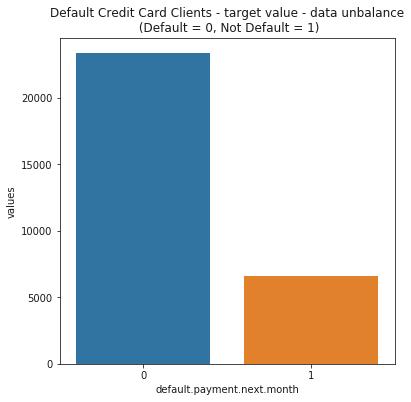

class size
default.payment.next.month
0    23364
1     6636
dtype: int64
class distribution
0    77.88
1    22.12
Name: Percentage, dtype: float64


In [270]:
temp = df["default.payment.next.month"].value_counts()
df1 = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()
#there is a clear class imbalance and this might actually bias the dataset.
#Use SMOTE to create synthetic samples
print("class size")
print(df.groupby(["default.payment.next.month"]).size())
P = df.groupby(["default.payment.next.month"])['ID'].count().reset_index()
P['Percentage'] = 100 * P['ID']  / P['ID'].sum()
print("class distribution")
print(P['Percentage'])

## 2.4 Data Exploration

### 2.4.1 What is the distribution of Credit Limit?

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


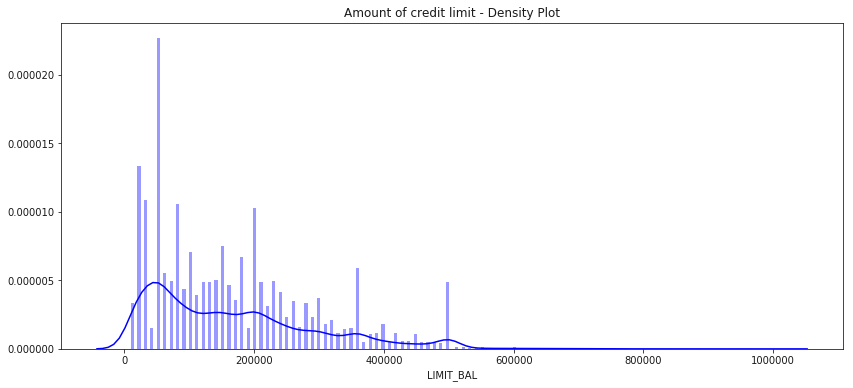

In [327]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [328]:
#the most frequent credit limit is 50k and we can quickly check this
print(df['LIMIT_BAL'].value_counts().head(1))
print(len(df['LIMIT_BAL'].unique()))
#the number of unique credit limits is 81

50000.0    3365
Name: LIMIT_BAL, dtype: int64
81


### 2.4.2 Distribution of Credit Limit grouped by default payments

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


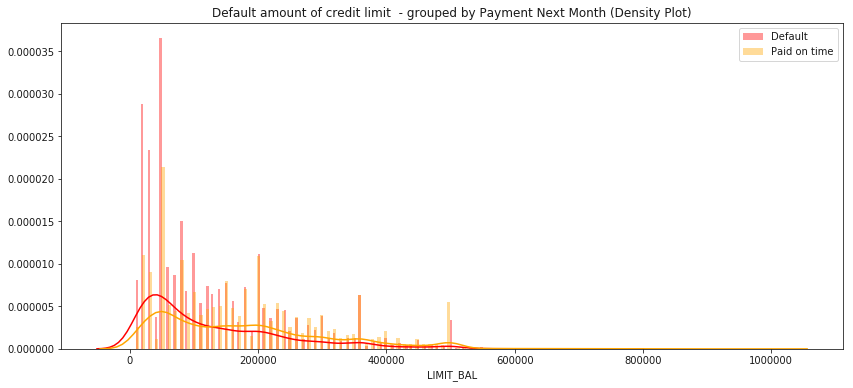

In [329]:
class_0 = df.loc[df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red", label="Default")
sns.distplot(class_0,kde=True,bins=200, color="orange", label="Paid on time")
plt.legend()
plt.show()
# distribution of defaults is pretty similar to distribution of Balance Limits which means that the percentage 
# of default for each Balance Limit bin is very similar barring a few exceptions

## 2.4.3 Does Sex affect Balance Limits?

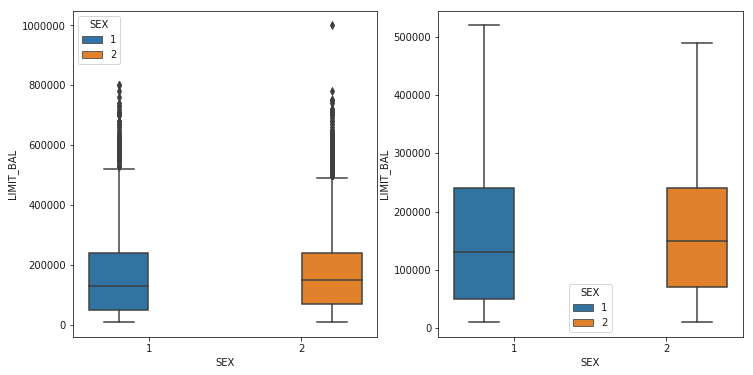

In [330]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, showfliers=False)
plt.show();

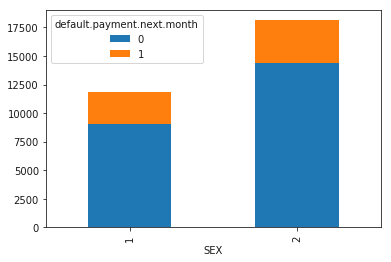

In [331]:
gender = df.groupby(['SEX', 'default.payment.next.month']).size().unstack(1)
gender.plot(kind='bar', stacked = True)

## 2.5 T-SNE Component Analysis (Alternative to PCA)

/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


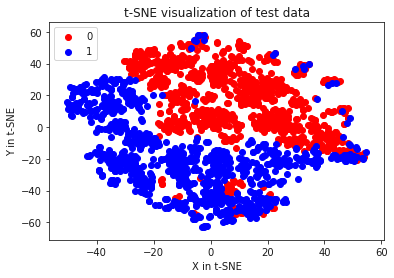

In [68]:
#Set df4 equal to a set of a sample of 1000 deafault and 1000 non-default observations.
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
df2 = df[df.default == 0].sample(n = 1000)
df3 = df[df.default == 1].sample(n = 1000)
df4 = pd.concat([df2, df3], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df4_std = standard_scaler.fit_transform(df4)

#Set y equal to the target values.
y = df4.ix[:,-1].values

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df4_std)

#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()
#there seems to be a plane of separation that divides dataset into two clusters

In [332]:
df.dtypes

ID                               int64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default.payment.next.month       int64
dtype: object

## 2.6 Train Test Splitting and Resampling

In [337]:
df_feat.rename(columns={'default.payment.next.month':'default'}, inplace=True)
y = df_feat["default"]
df_1 = df_feat.drop(["default"], axis = 1)

#function to split the dataset
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

#splitting data into train and test
n_valid = 5000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_1, n_trn)
X_train, X_valid = split_vals(df_1, n_trn)
y_train, y_valid = split_vals(y, n_trn)

#dropping customer ID from train and test dataset
X_train_IDs = X_train["ID"]
X_train.drop(["ID"], axis = 1, inplace = True)
X_valid_IDs = X_valid["ID"]
X_valid.drop(["ID"], axis = 1, inplace = True)

In [280]:
#synthetic minority sampling to reduce the imbalance in class labels
sm = SMOTE(kind = 'svm', random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
X_res.shape

Resampled dataset shape Counter({1: 19422, 0: 19422})


(38844, 86)

## 3. Modelling

In [ ]:
#function for visualization of confusion matrix 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 3.1 Tree Based Models

In [338]:
#converting categorical variables into label coding as this type of 
#encoding is better than one-hot encoding for tree-based modesl
train_cats(X_train)
apply_cats(X_valid, X_train)

In [85]:
#Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
m = GradientBoostingClassifier(n_estimators=2000, min_samples_leaf=200, max_features=0.5)
m.fit(X_train, y_train)
metrics.accuracy_score(y_valid,m.predict(X_valid))

0.827

In [339]:
#Random Forest
m = RandomForestClassifier(n_estimators=1000, min_samples_leaf=100, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train)
final_preds = m.predict_proba(X_valid)
metrics.accuracy_score(y_valid,m.predict(X_valid))

0.8334

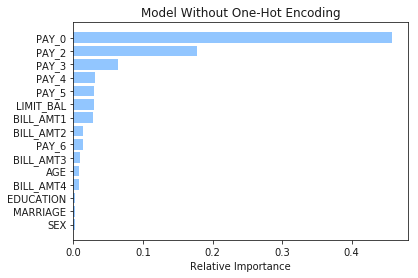

In [340]:
#feature importance from Random Forest
features = X_train.columns
importances = m.feature_importances_[0:15]
indices = np.argsort(importances)
plt.title('Model Without One-Hot Encoding')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Recall metric in the train dataset: 36.48393194706994%


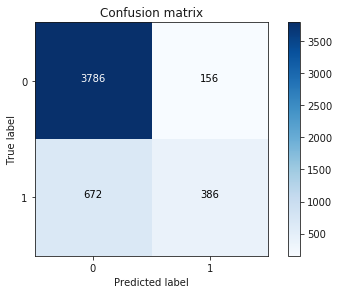

In [99]:
#confusion Matric
cnf_matrix_tra = confusion_matrix(y_valid, m.predict(X_valid))
print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]
                                                                                +cnf_matrix_tra[1,1])))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

## 3.2 Logistic Regression

In [242]:
#cross validation
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
m.fit(X_train, y_train)
metrics.accuracy_score(y_valid,m.predict(X_valid))

/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.788

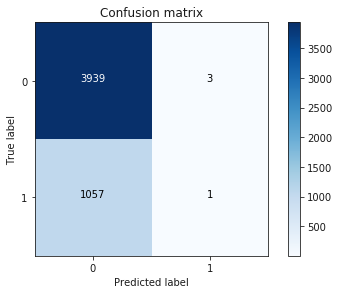

In [243]:
#confusion Matric
cnf_matrix_tra = confusion_matrix(y_valid, m.predict(X_valid))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

## 3.3 Support Vector Machines

In [244]:
#cross validation
from sklearn.svm import SVC
m = SVC(gamma='auto')
m.fit(X_train, y_train)
metrics.accuracy_score(y_valid,m.predict(X_valid))

0.7904

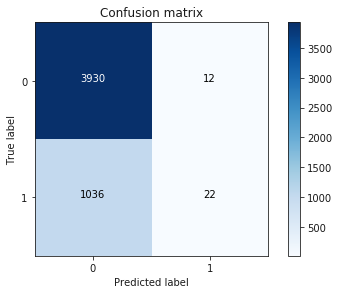

In [245]:
#confusion Matric
cnf_matrix_tra = confusion_matrix(y_valid, m.predict(X_valid))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

## 3.4 Artificial Neural Network

In [313]:
#data prep for Neural Network

#converting sex, marriage, age and education into one-hot
sexfeat_dict = make_onehot_feat_dict(df, 'SEX', 'SEX')
educationfeat_dict = make_onehot_feat_dict(df, 'EDUCATION', 'EDUCATION')
marriagefeat_dict = make_onehot_feat_dict(df, 'MARRIAGE', 'MARRIAGE')
agefeat_dict = make_onehot_feat_dict(df, 'AGE', 'AGE')
all_dicts = [ sexfeat_dict, educationfeat_dict,marriagefeat_dict,agefeat_dict]
feat_dict = all_dicts[0].copy()
for d in all_dicts[1:]:
    feat_dict.update(d)
cols = [col for col in df.columns if col not in ['SEX', 'EDUCATION','MARRIAGE','Age']]
df_rest = df[cols]
df_feat = pd.DataFrame.from_dict(feat_dict)
df_feat = pd.concat([df_feat, df_rest], axis=1)
df_feat.shape
df_feat.rename(columns={'default.payment.next.month':'default'}, inplace=True)
y = df_feat["default"]
df_1 = df_feat.drop(["default"], axis = 1)

#train and test splitting
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 5000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_1, n_trn)
X_train, X_valid = split_vals(df_1, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train_IDs = X_train["ID"]
X_train.drop(["ID"], axis = 1, inplace = True)
X_valid_IDs = X_valid["ID"]
X_valid.drop(["ID"], axis = 1, inplace = True)

#standardising training and testing datasets to ensure that features are normalized
X_train = StandardScaler().fit_transform(X_train)
X_valid = StandardScaler().fit_transform(X_valid)


/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [314]:
#ANN model building and fitting
model = Sequential()
model.add(Dense(12, input_dim=85, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10,  verbose=1)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]
metrics.accuracy_score(y_valid,rounded)

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=85, activation="relu", kernel_initializer="uniform")`
  
/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Epoch 1/100
25000/25000 [==============================] - 3s 115us/step - loss: 0.4968 - acc: 0.7767
Epoch 2/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4832 - acc: 0.7820
Epoch 3/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4809 - acc: 0.7888
Epoch 4/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4804 - acc: 0.7910
Epoch 5/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4783 - acc: 0.7929
Epoch 6/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4744 - acc: 0.7960
Epoch 7/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4715 - acc: 0.7971
Epoch 8/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4705 - acc: 0.7979
Epoch 9/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4704 - acc: 0.7997
Epoch 10/100
25000/25000 [==============================] - 2s 86us/step - loss: 0.4687 - 

0.8026

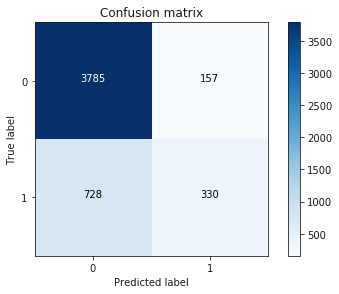

In [308]:
#confusion Matric
cnf_matrix_tra = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

## 4. User Segmentation Based on Clustering

## 4.2 Clustering Based on Principal Components

/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


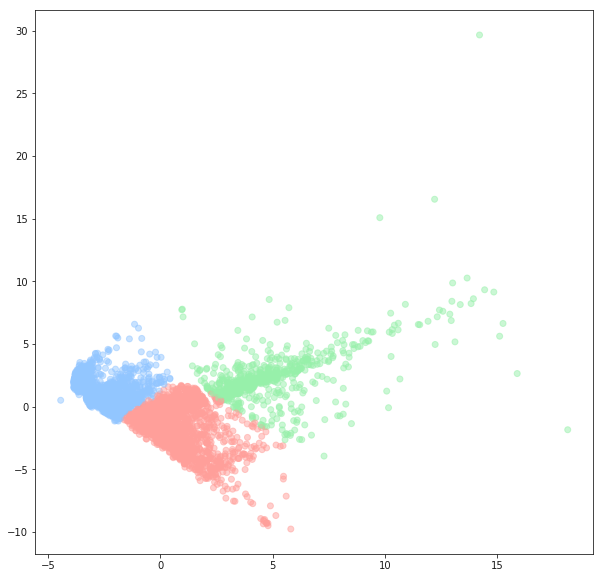

In [269]:
#Data Manipulation for standardising
k = pd.DataFrame(data = final_preds)
df_final = X_valid
df_final['preds'] = pd.Series(k.loc[:,0]).values
X = df_final.values

#Data Normalization
X_std = StandardScaler().fit_transform(X)
X_std[np.isnan(X_std)] = 0

#generating principal components for effective clustering and visualization
pca = PCA(n_components=2)
x_7d = pca.fit_transform(X_std)

#K-means Clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (10,10))
plt.scatter(x_7d[:,0],x_7d[:,1], c= label_color, alpha=0.5) 
plt.show()

#from the chart below, its clear that there are three different types of users based on their payment behavior

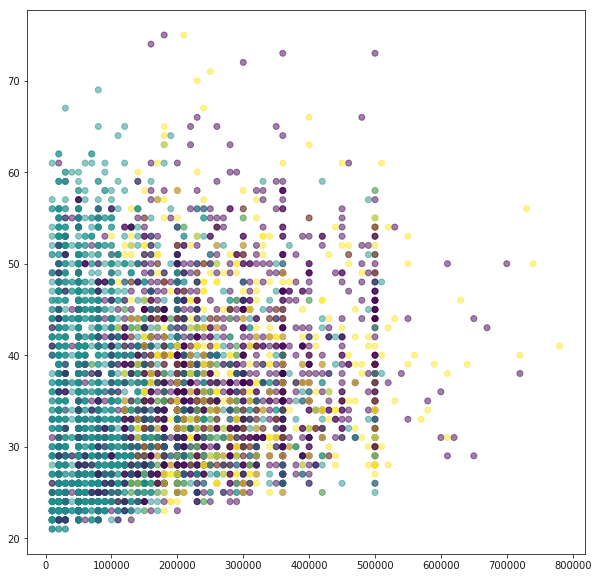

In [268]:
#plotting the clusters with respect to other variables
se = pd.Series(X_clustered)
df_final["cluster"] = se.values
plt.figure(figsize = (10,10))
plt.scatter(df_final["LIMIT_BAL"],df_final["AGE"], c= df_final["cluster"], alpha=0.5) 
plt.show()
#although the three clusters were different as per principal components, they do not have distinct 
#boundaries with the some of the variables

## 4.2 Clustering Based on Predicted Probability of Default

In [256]:
#Data Manipulation
kmeans = KMeans(n_clusters = 3)
df_final2 = df_final.drop(["cluster"], axis = 1)
df_cl = df_final2[['LIMIT_BAL','preds','AGE']]

In [230]:
#K-means Clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(df_cl)

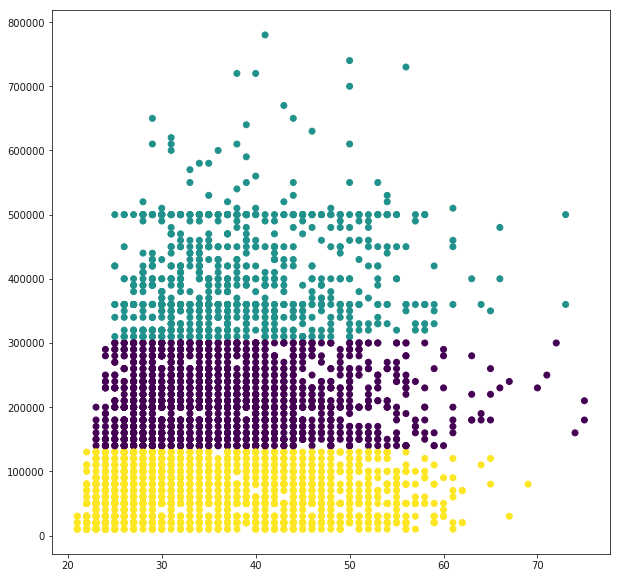

In [232]:
se = pd.Series(X_clustered)
df_final2["cluster"] = se.values
plt.figure(figsize = (10,10))
plt.scatter(df_final2["AGE"],df_final2["LIMIT_BAL"], c= df_final2["cluster"], alpha=1) 
plt.show()
#when you perform clustering on the predicted probability of default and a few other variables, there are three 
# different user segments

# Conclusion :
## Although there is very little we can infer from the distinct groups that are plotted in the chart above, there are three user groups that handle credit card debt differently. This information could potentially be used to help them make better decisions so that they are able to pay off their debts more efficiently